In [1]:
from fun_opti import *
import time

# Part I: Initialize the function

In [14]:
def optimize_NOV(sv,path_ori=os.path.abspath('./s73.00_v25.00_rn1.00_ln2.50_b20_g0.jpg'),output=0,append=1):
    sigma=sv[0]
    v0=sv[1]

    # preprosessing the ori image
    exp_zoom=reshape_Exp(path_ori)

    # gen and post processing the syn image
    syn_array,_,_,_=gen_Drop(sigma=sigma,volume0=v0,rneedle=1)
    # syn_arr,wmax,rneedle=gen_doplet_v5(sigma=sigma,volume0=v0,rneedle=0.5)

    # crop the margin of syn image and scale it
    syn_zoom=scale_Syn(syn_array)

    
    if output==0:
        NOV=cal_NOV(exp_zoom=exp_zoom,syn_zoom=syn_zoom,output=output)
        if append==1:
            Xs.append(sv)
            NOVs.append(NOV)  
        return NOV

    elif output==1:
        NOV=cal_NOV(exp_zoom=exp_zoom,syn_zoom=syn_zoom,output=output)
        print ('x=%.2f,%.2f and NOV=%.4f'%(sv[0],sv[1],NOV))
        if append==1:
            Xs.append(sv)
            NOVs.append(NOV)  
        return NOV
    else:     
        NOV,C=cal_NOV(exp_zoom=exp_zoom,syn_zoom=syn_zoom,output=output)
        return NOV,C

## Start Optimization

In [15]:
import scipy.optimize

Xs=[]
NOVs=[]

x0=np.asarray((80,15))

# use scipy obtimaize the parameter
opStart=time.time()
print('Optimization Start')
#sigma; v0; length_Ne,r_Ne; x,y; scaling_rate;
res=scipy.optimize.minimize(optimize_NOV,x0,method='nelder-mead') #SLSQP #nelder-mead
#res=scipy.optimize.minimize(obtimize_v5,x0,method='SLSQP',options={'maxiter':15})
opEnd=time.time()
print('Optimize Program Running Time: ',opEnd-opStart)

Optimization Start
Optimize Program Running Time:  382.4611129760742


In [16]:
print(res)

 final_simplex: (array([[69.85450745, 22.05012274],
       [69.8545588 , 22.05013334],
       [69.85449518, 22.0501236 ]]), array([0.00133217, 0.00133217, 0.00133217]))
           fun: 0.0013321676866075518
       message: 'Optimization terminated successfully.'
          nfev: 97
           nit: 38
        status: 0
       success: True
             x: array([69.85450745, 22.05012274])


<function matplotlib.pyplot.show(close=None, block=None)>

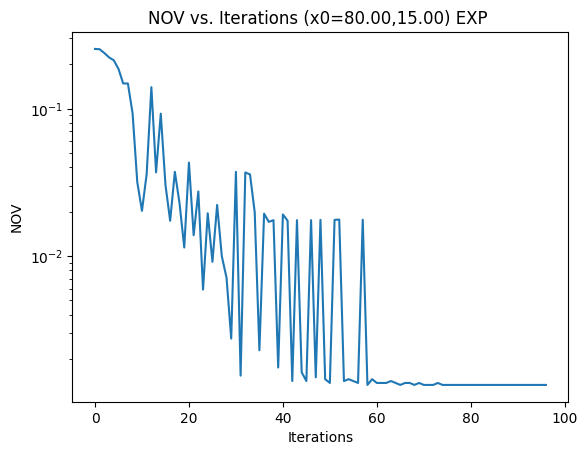

In [29]:
plt.title('NOV vs. Iterations (x0=%.2f,%.2f) EXP '%(x0[0],x0[1]))
plt.yscale("log")
plt.plot(NOVs)
plt.xlabel('Iterations')
plt.ylabel('NOV')
plt.show

In [20]:
#save the record of optimization
arr_xs=np.asarray(Xs)
arr_NOVs=np.asarray(NOVs)
opti_record=np.vstack((arr_xs.T,arr_NOVs))
np.save('./opti_record_xs_exp_s%.2fv%.2f.npy'%(x0[0],x0[1]),opti_record)

### Visualize the Optimization Result

In [8]:
NOV,C=optimize_NOV(np.asarray((res.x[0],res.x[1])),output=1)

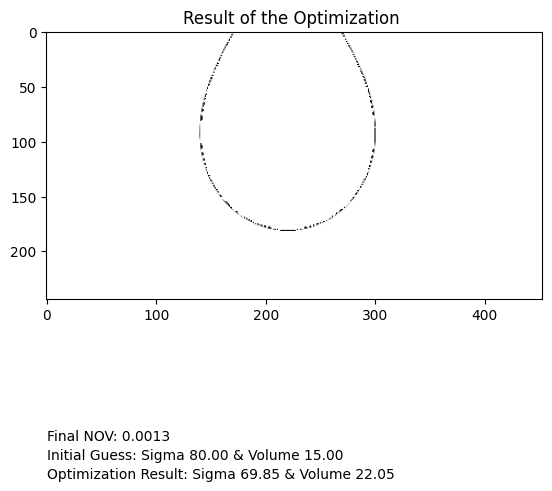

In [9]:
plt.imshow(C,cmap='gray')
plt.title('Result of the Optimization ')
plt.text(0,390,'Initial Guess: Sigma %.2f & Volume %.2f'%(x0[0], x0[1]))
plt.text(0,407,'Optimization Result: Sigma %.2f & Volume %.2f'%(res.x[0], res.x[1]))
plt.text(0,373,'Final NOV: %.4f'%(res.fun))
plt.savefig(fname='Opti_Result_RV_s%.2f_IG_s%.2f_v%.2f.png'%(73.04,x0[0],x0[1]))

# Contour Map with Synthetic s75v15

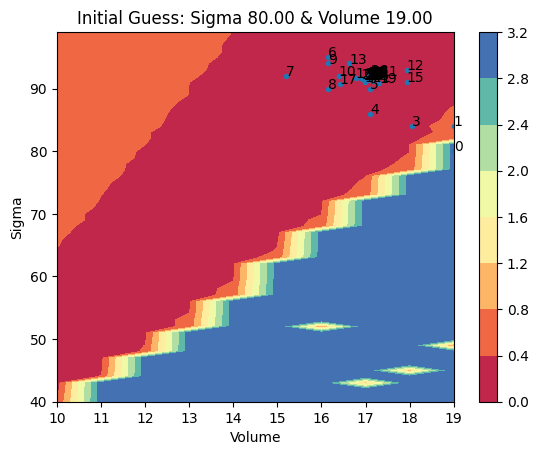

In [151]:
# Import the Map Data
NOVs_map=np.load('./NOVs_map.npy')
#NOVs_map=np.load('./NOVs_localmap_s75v15.npy')
sigma=np.arange(0,100,1)
volume=np.arange(0,20,1)
arxs=np.asarray(Xs)
x=arxs[:,0]
y=arxs[:,1]
z=NOVs

fig, ax = plt.subplots()
cs = ax.contourf(volume, sigma, NOVs_map, cmap=plt.get_cmap('Spectral'))
im = ax.scatter(y,x,marker='.')


n=np.arange(y.shape[0])
for i,txt in enumerate(n):
    ax.annotate(txt,(y[i],x[i]))
#添加colorbar
cbar = fig.colorbar(cs)

plt.xlabel('Volume')
plt.ylabel('Sigma')

plt.xlim((10,19))#volume 10-19
plt.ylim((40,99))#sigma 55-99

plt.title('Initial Guess: Sigma %.2f & Volume %.2f'%(x0[0], x0[1]))

plt.show()

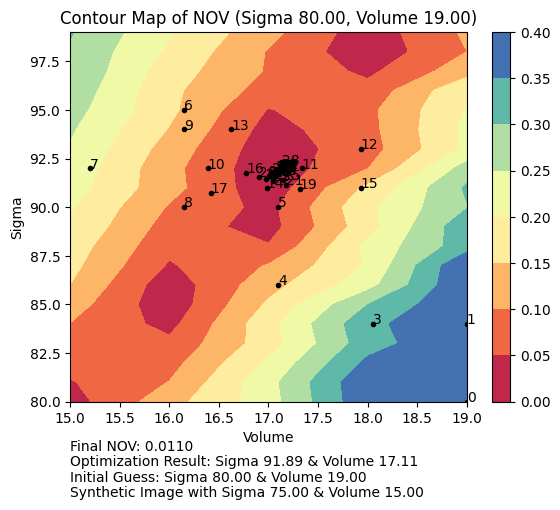

In [155]:
NOVs_map=np.load('./NOVs_map.npy')

NOVs_map0=NOVs_map
NOVs_map0[NOVs_map0>0.4]=0.4
sigma=np.arange(0,100,1)
volume=np.arange(0,20,1)
arxs=np.asarray(Xs)
x=arxs[:,0]
y=arxs[:,1]
z=NOVs


fig, ax = plt.subplots()
cs = ax.contourf(volume, sigma, NOVs_map0, cmap=plt.get_cmap('Spectral'))
im = ax.scatter(y,x,marker='.',color='black')


n=np.arange(y.shape[0])
for i,txt in enumerate(n):
    ax.annotate(txt,(y[i],x[i]))
#添加colorbar
cbar = fig.colorbar(cs)

plt.xlabel('Volume')
plt.ylabel('Sigma')

plt.xlim((15,19))#volume 10-19
plt.ylim((80,99))#sigma 55-99

textp=[15,77.5]
linespace=0.8
plt.text(textp[0],textp[1],'Final NOV: %.4f'%(res.fun))
plt.text(textp[0],textp[1]-linespace,'Optimization Result: Sigma %.2f & Volume %.2f'%(res.x[0], res.x[1]))
plt.text(textp[0],textp[1]-linespace*2,'Initial Guess: Sigma %.2f & Volume %.2f'%(x0[0], x0[1]))
plt.text(textp[0],textp[1]-linespace*3,'Synthetic Image with Sigma 75.00 & Volume 15.00')

#for i in range(len(x)):
#    if i<27:
#        plt.text(14,65-i,s='NOV_%.0f=%.4f'%(i,z[i]),color='blue')
#    elif i<54:
#        plt.text(15,92-i,s='NOV_%.0f=%.4f'%(i,z[i]),color='blue')

plt.title('Contour Map of NOV (Sigma %.2f, Volume %.2f)'%(x0[0], x0[1]))
plt.savefig(fname='Contour_Map_RV_s%.2f_v%.2f_IG_s%.2f_v%.2f.png'%(75,15,x0[0],x0[1]))
plt.show()

In [143]:
# Import the Map Data
NOVs_localmap=np.load('./NOVs_localmap_s75v15.npy')
NOVs_localmap0=NOVs_localmap
NOVs_localmap0[NOVs_localmap0>0.05]=0.05


In [ ]:

sigma=np.arange(0,80,0.1)
volume=np.arange(0,16,0.1)
arxs=np.asarray(Xs)
x=arxs[:,0]
y=arxs[:,1]
z=NOVs

fig, ax = plt.subplots()
cs = ax.contourf(volume, sigma, NOVs_map, cmap=plt.get_cmap('Spectral'))
im = ax.scatter(y,x,marker='.')


n=np.arange(y.shape[0])
for i,txt in enumerate(n):
    ax.annotate(txt,(y[i],x[i]))
#添加colorbar
cbar = fig.colorbar(cs)

plt.xlabel('volume')
plt.ylabel('sigma')

plt.xlim((14,16))#volume 10-19
plt.ylim((75,85))#sigma 55-99

plt.title('Initial Guess: Sigma %.2f & Volume %.2f'%(x0[0], x0[1]))

plt.show()

# Contour Map of EXP s73

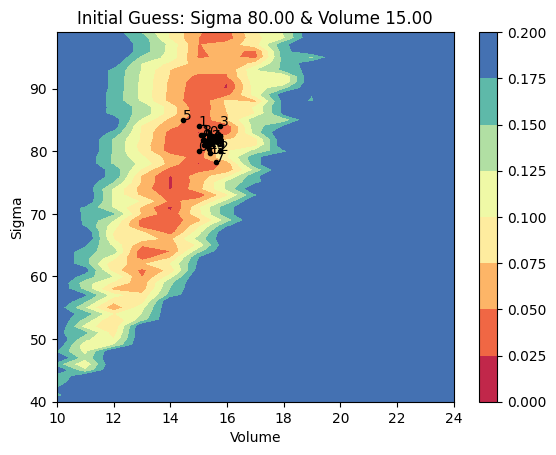

In [25]:
# Import the Map Data
NOVs_map=np.load('./NOVs_exp_miliq_s73_map.npy')
NOVs_map0=NOVs_map
NOVs_map0[NOVs_map0>0.2]=0.2
#NOVs_map=np.load('./NOVs_localmap_s75v15.npy')
sigma=np.arange(0,100,1)
volume=np.arange(0,30,1)

arxs=np.asarray(Xs)
x=arxs[:,0]
y=arxs[:,1]
z=NOVs

fig, ax = plt.subplots()
cs = ax.contourf(volume, sigma, NOVs_map, cmap=plt.get_cmap('Spectral'))
im = ax.scatter(y,x,marker='.',color='black')

n=np.arange(y.shape[0])
for i,txt in enumerate(n):
    ax.annotate(txt,(y[i],x[i]))
#添加colorbar
cbar = fig.colorbar(cs)

plt.xlabel('Volume')
plt.ylabel('Sigma')

plt.xlim((10,24))#volume 10-24
plt.ylim((40,99))#sigma 40-99

plt.title('Initial Guess: Sigma %.2f & Volume %.2f'%(x0[0], x0[1]))

plt.show()

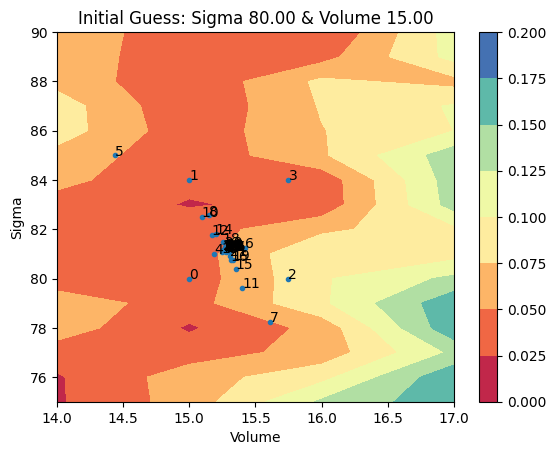

In [26]:
# Import the Map Data
NOVs_map=np.load('./NOVs_exp_miliq_s73_map.npy')
NOVs_map0=NOVs_map
NOVs_map0[NOVs_map0>0.2]=0.2
#NOVs_map=np.load('./NOVs_localmap_s75v15.npy')
sigma=np.arange(0,100,1)
volume=np.arange(0,30,1)

arxs=np.asarray(Xs)
x=arxs[:,0]
y=arxs[:,1]
z=NOVs

fig, ax = plt.subplots()
cs = ax.contourf(volume, sigma, NOVs_map, cmap=plt.get_cmap('Spectral'))
im = ax.scatter(y,x,marker='.')

n=np.arange(y.shape[0])
for i,txt in enumerate(n):
    ax.annotate(txt,(y[i],x[i]))
#添加colorbar
cbar = fig.colorbar(cs)

plt.xlabel('Volume')
plt.ylabel('Sigma')

plt.xlim((14,17))#volume 10-24
plt.ylim((75,90))#sigma 40-99

plt.title('Initial Guess: Sigma %.2f & Volume %.2f'%(x0[0], x0[1]))

plt.show()

In [190]:
print(np.min(NOVs_map0))

0.1673794660645504
